In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

# Need for this homework
import geopandas as gpd
import contextily as cx

plt.style.use('default')
# This next line tells jupyter to render the images inline
%matplotlib inline
import matplotlib_inline


In [2]:
#combine all files into one big df

# df1 = pd.read_csv('./data/transit_dfs/BUS01_df.csv')
# df2 = pd.read_csv('./data/transit_dfs/BUS02_df.csv')
# df3 = pd.read_csv('./data/transit_dfs/BUS03_df.csv')
# df4 = pd.read_csv('./data/transit_dfs/BUS04_df.csv')
# df5 = pd.read_csv('./data/transit_dfs/BUS05_df.csv')
# df6 = pd.read_csv('./data/transit_dfs/BUS06_df.csv')
# #df7 = pd.read_csv('./data/transit_dfs/BUS07_df.csv') theres nothing in this csv
# df8 = pd.read_csv('./data/transit_dfs/TRX01_df.csv')
# df9 = pd.read_csv('./data/transit_dfs/TRX02_df.csv')
# df10 = pd.read_csv('./data/transit_dfs/TRX03_df.csv')

# #df4.rename(columns={'ES405_PM1_Concentration_ug/m3':'ES642_PM2.5_Concentration_ug/m3'}, inplace=True)
# df5.rename(columns={'ES405_PM1_Concentration_ug/m3':'ES642_PM2.5_Concentration_ug/m3'}, inplace=True)
# df6.rename(columns={'ES405_PM1_Concentration_ug/m3':'ES642_PM2.5_Concentration_ug/m3'}, inplace=True)

# bigDF = pd.concat([df1, df2, df3, df4, df5, df6, df8, df9, df10])

# #get just the rows we want
# df = bigDF[['Timestamp_UTC','Latitude_ddeg','Longitude_ddeg','Elevation_m','ES642_PM2.5_Concentration_ug/m3','Time_Tuple','Date','Year','Month','Day_of_Year','Day_of_Month','Minute','Hour','Transit_ID','AQI','PM2.5_Category','Meso_West_Category']]
# df.to_csv('./data/transit_dfs/compressedAllDF.csv')

In [ ]:
# #Reducing the data to just the columns that we need
# #Manually go into allDF and delete the firs row that is ',0,1,2,3,4,...'
# df = pd.read_csv('./data/transit_dfs/allDF.csv')
# df = df[['Timestamp_UTC','Latitude_ddeg','Longitude_ddeg','Elevation_m','ES642_PM2.5_Concentration_ug/m3','Time_Tuple','Date','Year','Month','Day_of_Year','Day_of_Month','Minute','Hour','Transit_ID','AQI','PM2.5_Category','Meso_West_Category']]
# df.to_csv('./data/transit_dfs/compressedAllDF.csv')
# df.head()

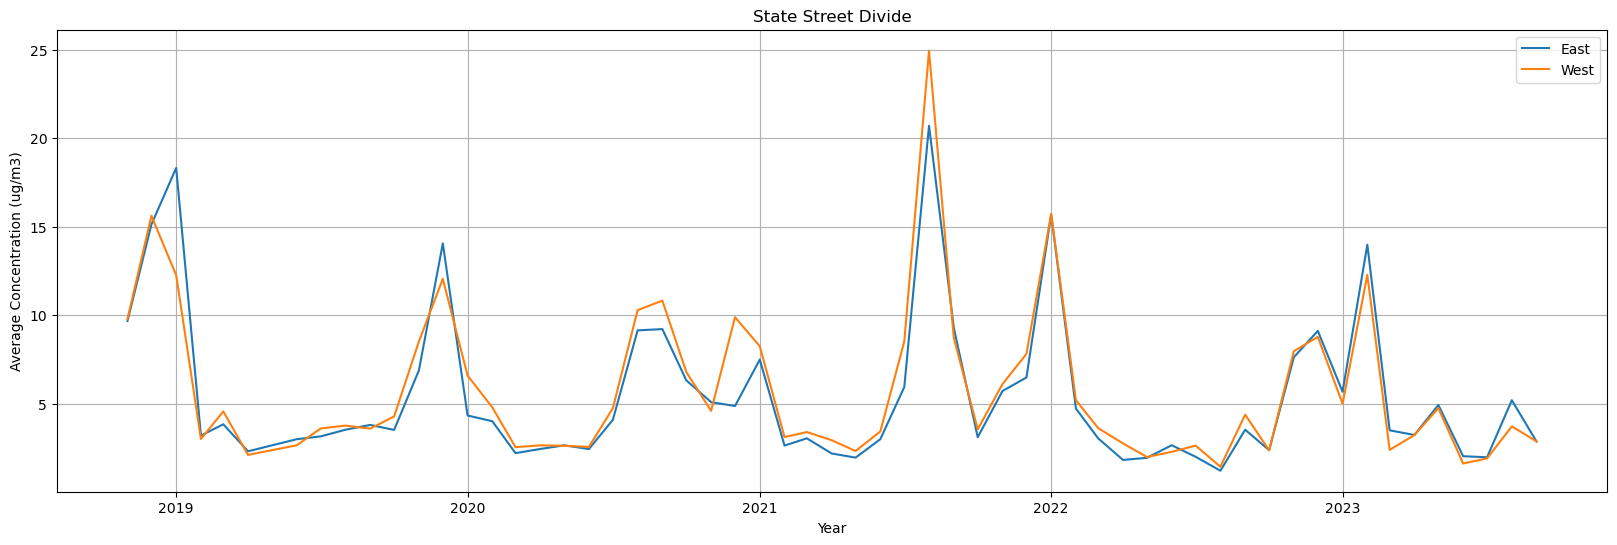

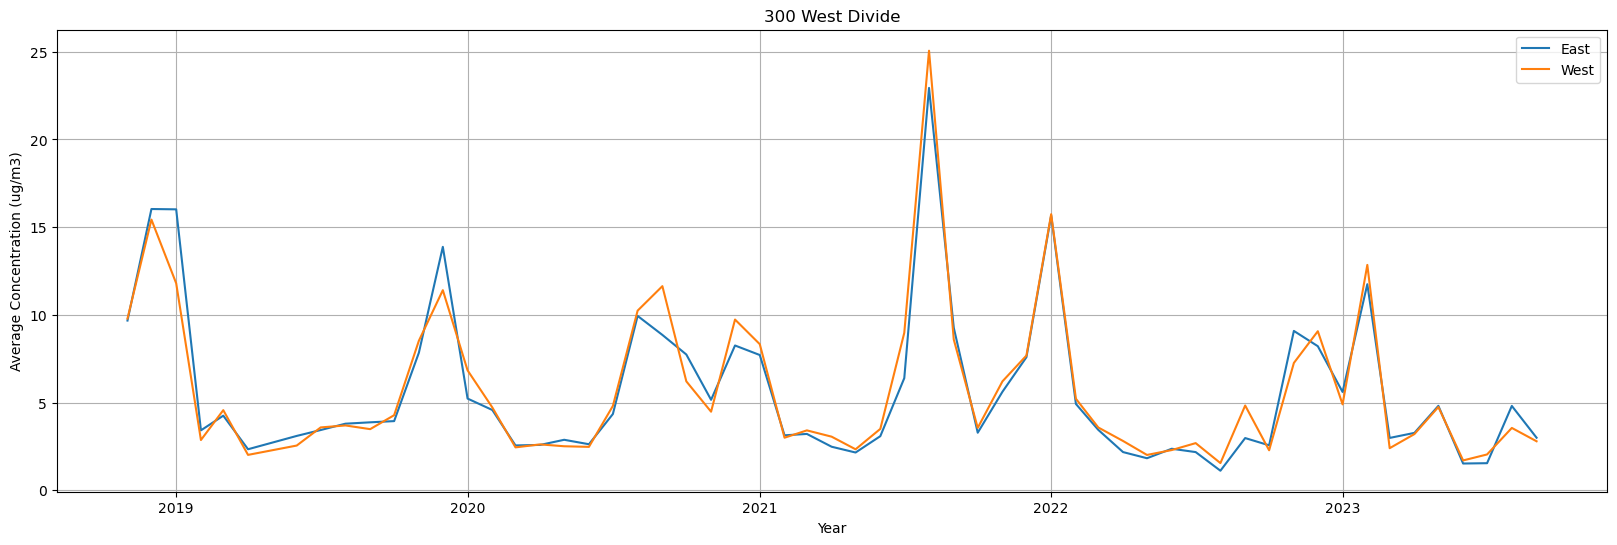

In [19]:
# create east and west data frames
df = pd.read_csv('./data/transit_dfs/compressedAllDF.csv')
westDF = df[df['Longitude_ddeg'] < -111.888245]
eastDF = df[df['Longitude_ddeg'] >= -111.888245]

west_monthly_avg = westDF.groupby(['Year', 'Month'])['ES642_PM2.5_Concentration_ug/m3'].mean().reset_index()
east_monthly_avg = eastDF.groupby(['Year', 'Month'])['ES642_PM2.5_Concentration_ug/m3'].mean().reset_index()

# Convert 'Year' and 'Month' to a datetime object for better plotting
east_monthly_avg['Month'] = pd.to_datetime(east_monthly_avg[['Year', 'Month']].assign(DAY=1))
west_monthly_avg['Month'] = pd.to_datetime(west_monthly_avg[['Year', 'Month']].assign(DAY=1))

# Combine east and west dataframes
combined_monthly_avg = pd.concat([east_monthly_avg, west_monthly_avg], keys=['East', 'West'])

# Plot the line graph for both east and west
plt.figure(figsize=(20, 6))
for region, data in combined_monthly_avg.groupby(level=0):
    plt.plot(data['Month'], data['ES642_PM2.5_Concentration_ug/m3'], label=region, linestyle='-')

plt.title('State Street Divide')
plt.xlabel('Year')
plt.ylabel('Average Concentration (ug/m3)')
plt.legend()  # Add legend to differentiate between East and West
plt.grid(True)
plt.show()

#Here is if instead of a dividing along state street, we divided along 300 west
westDF = df[df['Longitude_ddeg'] < -111.899664]
eastDF = df[df['Longitude_ddeg'] >= -111.899664]

west_monthly_avg = westDF.groupby(['Year', 'Month'])['ES642_PM2.5_Concentration_ug/m3'].mean().reset_index()
east_monthly_avg = eastDF.groupby(['Year', 'Month'])['ES642_PM2.5_Concentration_ug/m3'].mean().reset_index()

# Convert 'Year' and 'Month' to a datetime object for better plotting
east_monthly_avg['Month'] = pd.to_datetime(east_monthly_avg[['Year', 'Month']].assign(DAY=1))
west_monthly_avg['Month'] = pd.to_datetime(west_monthly_avg[['Year', 'Month']].assign(DAY=1))

# Combine east and west dataframes
combined_monthly_avg = pd.concat([east_monthly_avg, west_monthly_avg], keys=['East', 'West'])

# Plot the line graph for both east and west
plt.figure(figsize=(20, 6))
for region, data in combined_monthly_avg.groupby(level=0):
    plt.plot(data['Month'], data['ES642_PM2.5_Concentration_ug/m3'], label=region, linestyle='-')

plt.title('300 West Divide')
plt.xlabel('Year')
plt.ylabel('Average Concentration (ug/m3)')
plt.legend()  # Add legend to differentiate between East and West
plt.grid(True)
plt.show()

C:\Users\johns\AppData\Local\Temp\ipykernel_26260\2933693158.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  elevationDF = df[df['Elevation_m'] < 1400][df['Elevation_m'] > 1200]


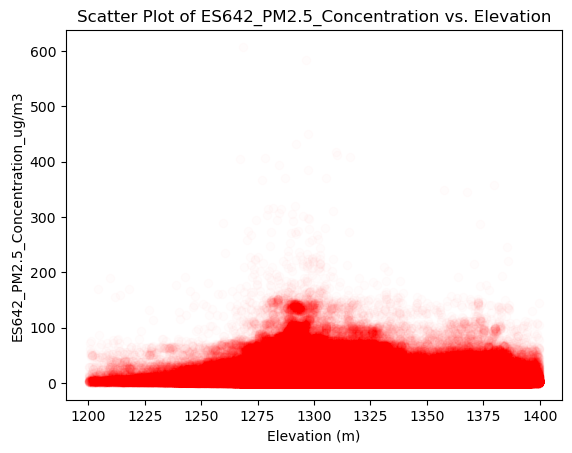

In [18]:
# I'm curious to see if elevation has any effect on PM2.5 concentration
# SLC's elevation is 4265ft (1300 meters)

# just going to rule out any obvious outliers
elevationDF = df[df['Elevation_m'] < 1400][df['Elevation_m'] > 1200]

plt.scatter(elevationDF['Elevation_m'], elevationDF['ES642_PM2.5_Concentration_ug/m3'], alpha = .01, color='red')
plt.title('Scatter Plot of ES642_PM2.5_Concentration vs. Elevation')
plt.xlabel('Elevation (m)')
plt.ylabel('ES642_PM2.5_Concentration_ug/m3')
plt.show()